#      About Aerofit

Aerofit is a leading brand in the field of fitness equipment. 
Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and 
fitness accessories to cater to the needs of all categories of people.

## Purpose

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of 
treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. 
The team decides to investigate whether there are differences across the product with respect to customer characteristics.

## To Find
1.Perform descriptive analytics to create a customer profile for each 
AeroFit treadmill product by developing appropriate tables and charts.

2.For each AeroFit treadmill product, construct two-way contingency tables and 
compute all conditional and marginal probabilities along with their insights/impact on the business.


## Dataset

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months.
The dataset has the following features:
    
Product Purchased: 	KP281, KP481, or KP781
Age: 	In years
Gender: 	Male/Female
Education: 	In years
MaritalStatus: 	Single or partnered
Usage: 	The average number of times the customer plans to use the treadmill each week.
Income: 	Annual income (in $)
Fitness: 	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
Miles: 	The average number of miles the customer expects to walk/run each week

In [105]:
## Analysis
## importing Required Libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [6]:
df.shape

(180, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
#number of unique values in our data
for i in df.columns:
  print(i,':',df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


In [11]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [12]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


## Observations:

1.There are no missing values in the data.
2.There are 3 unique products in the dataset.
3.KP281 is the most frequent product bought.
4.Minimum & Maximum age of the person is 18 & 50, mean is 28.79 and 75% of persons have age less than or equal to 33.
5.Most of the people are having 16 years of education i.e. 75% of persons are having education <= 16 years.
6.Standard deviation for Income & Miles is very high. These variables might have the outliers in it.
7.More Males are interested in buying products i.e(104 out of 180)
8.More Married People are showing interest in buying products i.e (107 out of 180)

In [13]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [14]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

<AxesSubplot:>

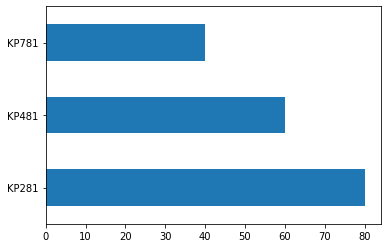

In [16]:
df['Product'].value_counts().plot(kind='barh')

# Univariate Analysis


Understanding the distribution of the data for the quantitative attributes:

1.Age
2.Education
3.Usage
4.Fitness
5.Income
6.Miles

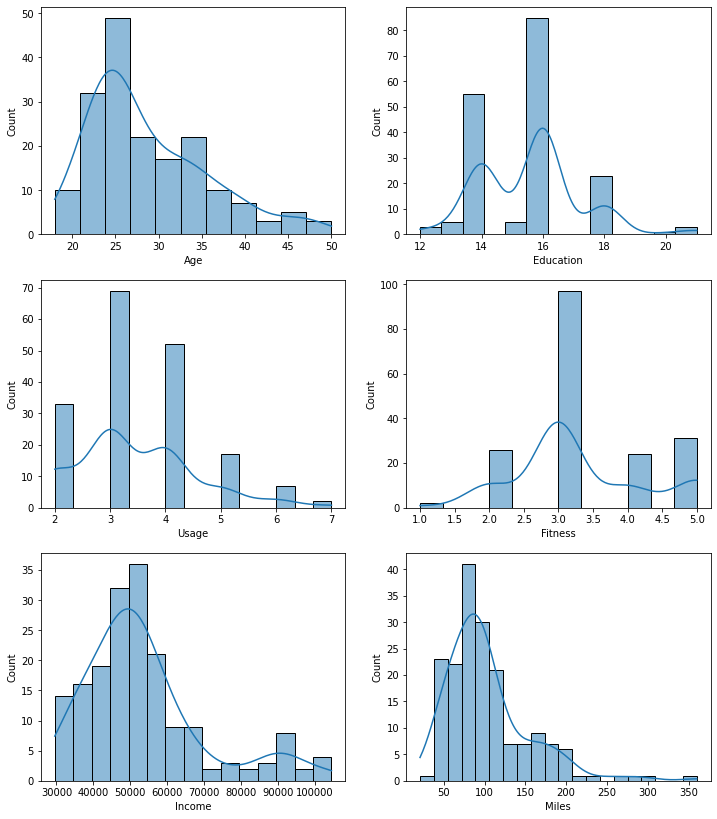

In [17]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1])
plt.show()

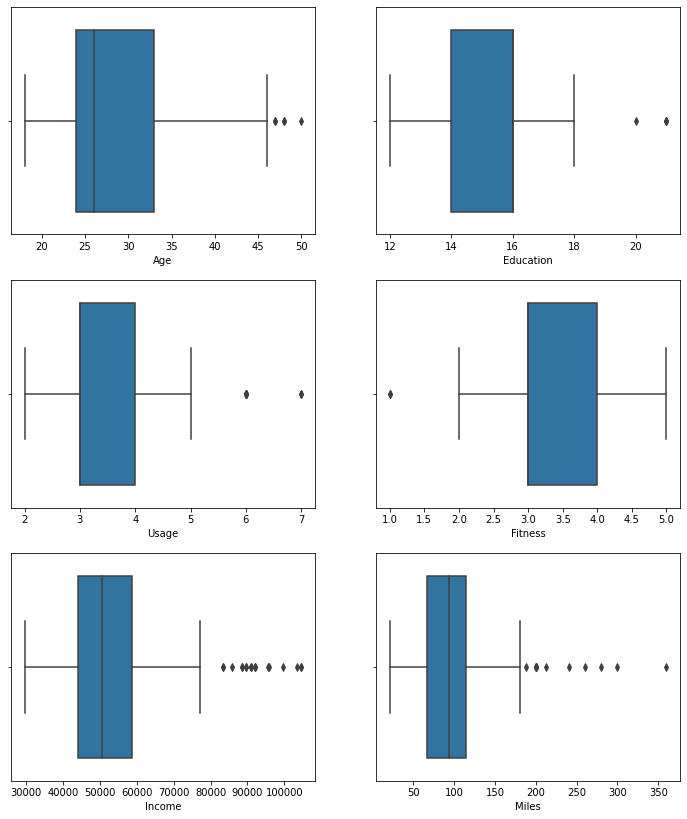

In [19]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", ax=axis[0,0])
sns.boxplot(data=df, x="Education", ax=axis[0,1])
sns.boxplot(data=df, x="Usage", ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", ax=axis[1,1])
sns.boxplot(data=df, x="Income", ax=axis[2,0])
sns.boxplot(data=df, x="Miles", ax=axis[2,1])
plt.show()

## Obervation:

Even from the boxplots it is quite clear that:
    
1.Age, Education and Usage are having very few outliers.
2.While Income and Miles are having more outliers.



In [ ]:
Understanding the distribution of the data for the Categorical attributes:

1.Product
2.Gender
3.MaritalStatus

[Text(0.5, 1.0, 'Product - counts')]

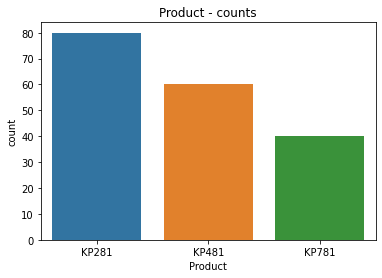

In [30]:
sns.countplot(data=df, x='Product').set(title='Product - counts')

[Text(0.5, 1.0, 'Gender - counts')]

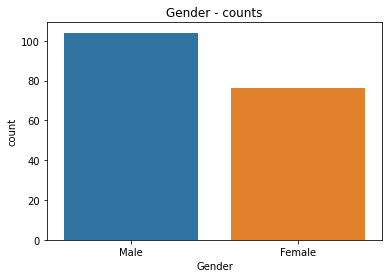

In [31]:
sns.countplot(data=df, x='Gender').set(title='Gender - counts')

[Text(0.5, 1.0, 'MaritalStatus - counts')]

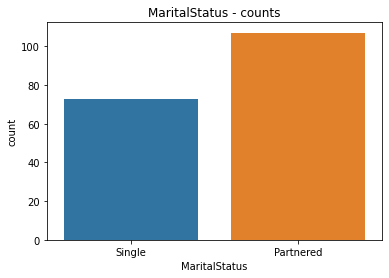

In [32]:
sns.countplot(data=df, x='MaritalStatus').set(title='MaritalStatus - counts')

## Obervations:

1.KP281 is the most frequent product.
2.Thare are more Males in the data than Females.
3.More Partnered persons are there in the data.

   # Bivariate Analysis

[Text(0.5, 1.0, 'Product vs Gender')]

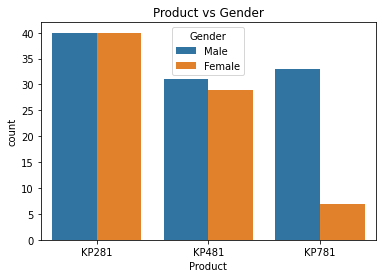

In [36]:
sns.countplot(data=df, x='Product', hue='Gender').set(title='Product vs Gender')

[Text(0.5, 1.0, 'Product vs MaritalStatus')]

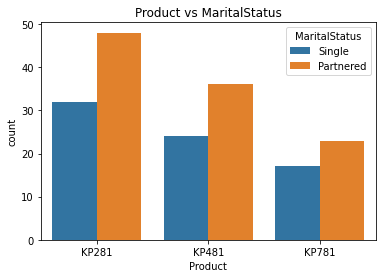

In [37]:
sns.countplot(data=df, x='Product', hue='MaritalStatus').set(title='Product vs MaritalStatus')


## Obervations

    Product vs Gender
        Equal number of males and females have purchased KP281 product and Almost same for the product KP481
        Most of the Male customers have purchased the KP781 product.

    Product vs MaritalStatus
        Customer who is Partnered, is more likely to purchase the product.



In [ ]:

 Checking if following features have any effect on the product purchased:

1.Age
2.Education
3.Usage
4.Fitness
5.Income
6.Miles

[Text(0.5, 1.0, 'Product vs Age')]

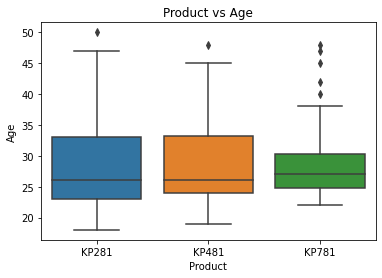

In [38]:
sns.boxplot(data=df,x='Product',y='Age').set(title='Product vs Age')

## Observations

--> Product vs Age

1.Customers purchasing products KP281 & KP481 are having same Age median value.
2.Customers whose age lies between 25-30, are more likely to buy KP781 product


[Text(0.5, 1.0, 'Product vs Education')]

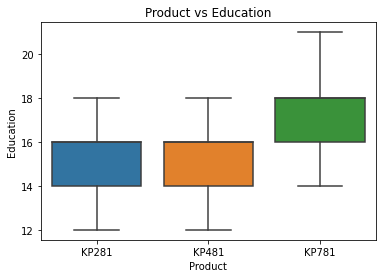

In [39]:
sns.boxplot(data=df,x='Product',y='Education').set(title='Product vs Education')

## Observations

--> Product vs Education

1.Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
2.While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481

[Text(0.5, 1.0, 'Product vs Usage')]

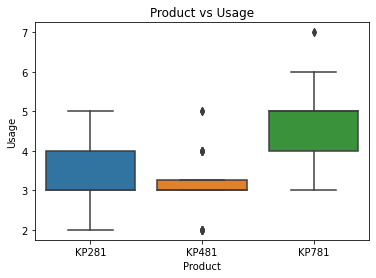

In [40]:
sns.boxplot(data=df,x='Product',y='Usage').set(title='Product vs Usage')

## Observations

--> Product vs Usage
       
1.Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
2.While the other customers are likely to purchasing KP281 or KP481.

[Text(0.5, 1.0, 'Product vs Fitness')]

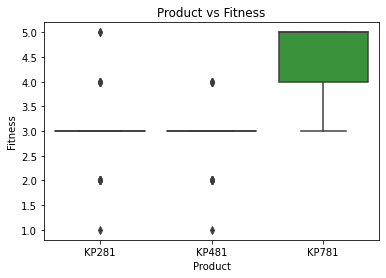

In [41]:
sns.boxplot(data=df,x='Product',y='Fitness').set(title='Product vs Fitness')

## observations

--> Product vs Fitness
        
1.The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.

[Text(0.5, 1.0, 'Product vs Income')]

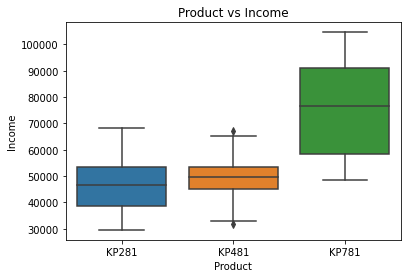

In [42]:
sns.boxplot(data=df,x='Product',y='Income').set(title='Product vs Income')

## observations

--> Product vs Income

1.Higher the Income of the customer (Income >= 60000USD), higher the chances of the customer to purchase the KP781 product.

[Text(0.5, 1.0, 'Product vs Miles')]

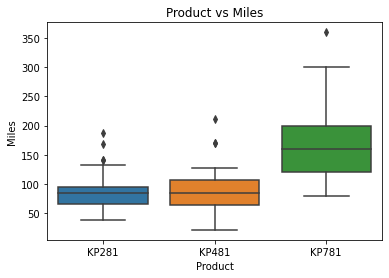

In [43]:
sns.boxplot(data=df,x='Product',y='Miles').set(title='Product vs Miles')

## observations

--> Product vs Miles

1.If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.


   # Multivariate Analysis

In [44]:
## correlation matrix for heat map
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

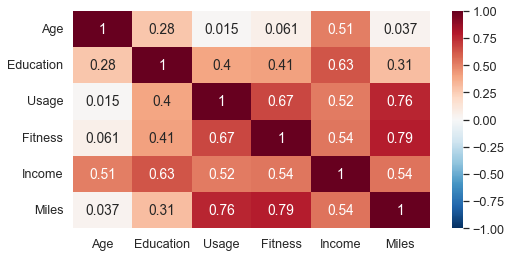

In [49]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    df.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1)

## observations:

1.Miles and Fitness and Miles and Usage are highly correlated, which means if a customer's fitness level is high they use more treadmills.
2.Income and education show a strong correlation. High-income and highly educated people prefer high-end models (KP781), as mentioned during Bivariant analysis of Categorical variables.
3.There is no corelation between Usage & Age or Fitness & Age which mean Age should not be barrier to use treadmills or specific model of treadmills.

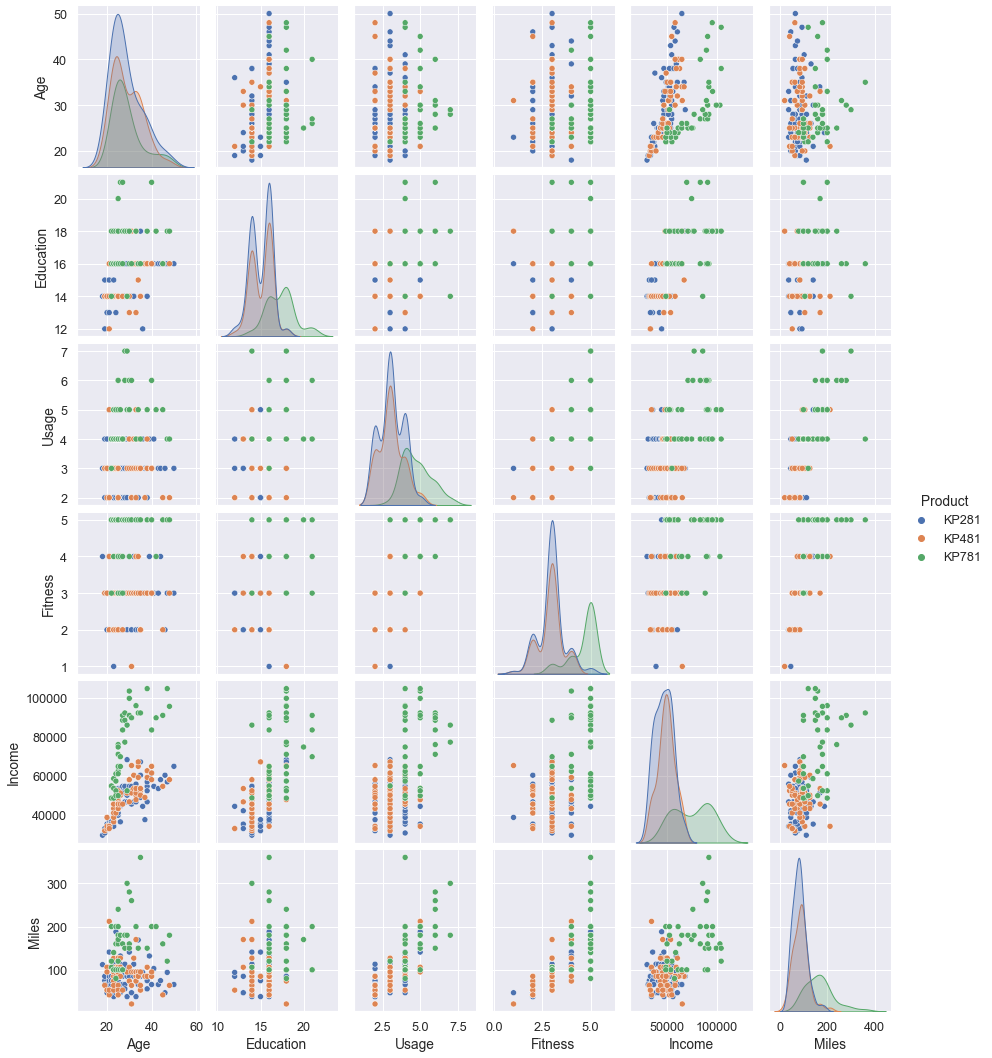

In [48]:
sns.pairplot(data=df, aspect=.85,hue='Product')

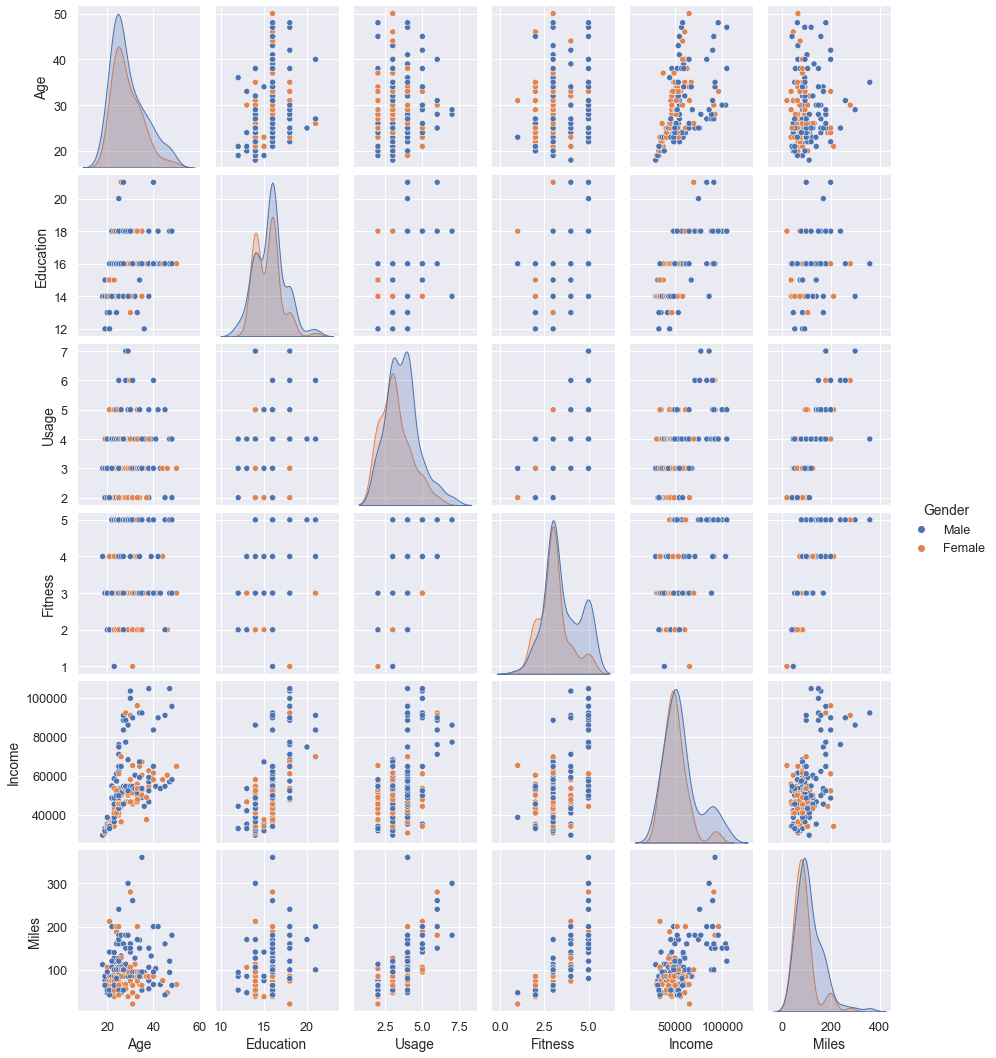

In [50]:
sns.pairplot(data=df, aspect=.85,hue='Gender')

<AxesSubplot:xlabel='Gender', ylabel='Usage'>

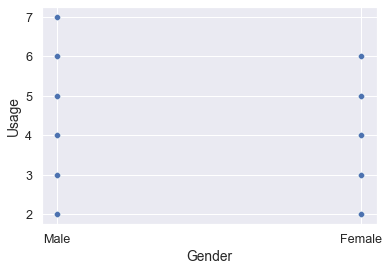

In [51]:
sns.scatterplot(x='Gender', y='Usage', data=df)

# Marginal Probabilities

    To be precise - normalized count for each variable is shown below

In [52]:
df['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [53]:
df['Gender'].value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

In [54]:
df['MaritalStatus'].value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

 ##  Obervations:

    Product
        44.44% of the customers have purchased KP2821 product.
        33.33% of the customers have purchased KP481 product.
        22.22% of the customers have purchased KP781 product.

    Gender
        57.78% of the customers are Male.

    MaritalStatus
        59.44% of the customers are Partnered.



# Conditional Probabilities

In [61]:
prob=df['Gender'].value_counts(normalize=True)
prob

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

In [65]:
## pM=probability(Male)
pM=prob['Male'].round(2)
pM

0.58

In [66]:
## pF=probability(Female)
pF=prob['Female'].round(2)
pF

0.42

In [68]:
## Probability of each product given gender
df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
df1

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [79]:
## probablity(p_781/Male)=p_781M
p_781M = df1['KP781']['Male'] / df1.loc['Male'].sum()
p_781M.round(2)

0.32

In [80]:
## probablity(p_781/Female)=p_781F
p_781F = df1['KP781']['Female'] / df1.loc['Female'].sum()
p_781F.round(2)

0.09

In [83]:
## probablity(p_481/Male)=p_481M
p_481M = df1['KP481']['Male'] / df1.loc['Male'].sum()
p_481M.round(2)

0.3

In [84]:
## probablity(p_481/Female)=p_481F
p_481F = df1['KP481']['Female'] / df1.loc['Female'].sum()
p_481F.round(2)

0.38

In [85]:
## probablity(p_281/Male)=p_281M
p_281M = df1['KP281']['Male'] / df1.loc['Male'].sum()
p_281M.round(2)

0.38

In [86]:
## probablity(p_281/Female)=p_281F
p_281F = df1['KP281']['Female'] / df1.loc['Female'].sum()
p_281F.round(2)

0.53

## Observations

1.Probability of Male buying customer is more.
2.Probability of Male buying KP781 product is more.
3.Probability of Female buying KP281 and KP481 products are more.

In [87]:
probM=df['MaritalStatus'].value_counts(normalize=True)
probM

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

In [89]:
## probability(Partnered)=pP
pP=probM['Partnered'].round(2)
pP

0.59

In [91]:
## probality(Single)=pS
pS=probM['Single'].round(2)
pS

0.41

In [92]:
##Probability of each product given MaritalStatus
df2 = pd.crosstab(index=df['MaritalStatus'], columns=[df['Product']])
df2

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,48,36,23
Single,32,24,17


In [93]:
## probablity(p_781/Partnered)=p_781P
p_781P = df2['KP781']['Partnered'] / df2.loc['Partnered'].sum()
p_781P.round(2)

0.21

In [94]:
## probablity(p_781/Single)=p_781S
p_781S = df2['KP781']['Single'] / df2.loc['Single'].sum()
p_781S.round(2)

0.23

In [95]:
## probablity(p_481/Partnered)=p_481P
p_481P = df2['KP481']['Partnered'] / df2.loc['Partnered'].sum()
p_481P.round(2)

0.34

In [96]:
## probablity(p_481/Single)=p_481S
p_481S = df2['KP481']['Single'] / df2.loc['Single'].sum()
p_481S.round(2)

0.33

In [97]:
## probablity(p_281/Partnered)=p_281P
p_281P = df2['KP281']['Partnered'] / df2.loc['Partnered'].sum()
p_281P.round(2)

0.45

In [98]:
## probablity(p_281/Single)=p_281S
p_281S = df2['KP281']['Single'] / df2.loc['Single'].sum()
p_281S.round(2)

0.44

 ## Observations

1.Probability of Partnered customers is more.
2.Probability of Single buying KP781 product is more.
3.Probablity of Partnered customers buying KP481 and KP281 products is more.

In [107]:
IFP=df['Product'].value_counts(normalize=True)
IFP

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [102]:
IFP['KP281']=IFP['KP281']*1500
IFP['KP481']=IFP['KP481']*1750
IFP['KP781']=IFP['KP781']*2500
IFP

KP281    120000
KP481    105000
KP781    100000
Name: Product, dtype: int64

[Text(0.5, 1.0, 'Total Income From Products')]

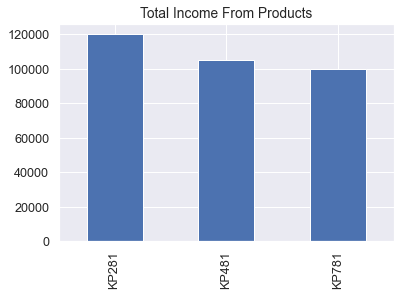

In [106]:
IFP.plot(kind='bar').set(title='Total Income From Products')

# Conclusion(Important Observations)

1.Model KP281 is the Best Selling Product with 44.45%.
2.Equal number of males and females have purchased KP281 product and Almost same for the product KP481.
3.Most of the Male customers have purchased the KP781 product.
4.Customers whose age lies between 25-30, are more likely to buy KP781 product.
5.Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
6.While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.
7.Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
8.Higher the Income of the customer (Income >= 60000 USD), higher the chances of the customer to purchase the KP781 product.
9.Miles and Fitness and Miles and Usage are highly correlated, which means if a customer's fitness level is high they use more treadmills.
10.Income and education show a strong correlation. High-income and highly educated people prefer high-end models (KP781), as mentioned during Bivariant analysis of Categorical variables.
11.There is no corelation between Usage & Age or Fitness & Age which mean Age should not be barrier to use treadmills or specific model of treadmills.
12.Probability of Male buying KP781 product is more.
13.Probability of Female buying KP281 and KP481 products are more.
14.Probability of Single buying KP781 product is more.
15.Probablity of Partnered customers buying KP481 and KP281 products is more.

# Recommendations

1.KP281 & KP481 are popular with customers earning USD 40,000 and USD 55,000 and can be offered by these companies as affordable models.
2.KP781 should be marketed as a Premium Model and marketing it to high income groups and educational over 16 years market segments could result in more sales.
3.As Probability of buying KP781 is more for Male and Single, Company Should make a Advertisment with a TOP Model to attract them.
4.As Probability of Buying KP281 and KP481 is more for females and Partnered, company should make a Advertisment with a Top Actress and try to release it on any women's occation day to attract them more.
5.Company need to introduce a new product with less or similar cost to KP281, as we can see sales of KP281 product are high.
6.Company should promote Premium model to sports people, because Sports people will maintain fitness and this will increase the sales of Premium Model.
7.company should conduct some Fitness awarness Program by promoting Premium Model KP781.
